In [1]:
!pip install -q keras
import keras

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, Add, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils 

batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

inputs = Input(shape=(28, 28, 1))
X = Conv2D(32, (3, 3), padding = 'same', activation='relu')(inputs)
X = Conv2D(64, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)
X = Dropout(0.25)(X)
X = Flatten()(X)
X = Dense(196, activation='relu')(X)
recon = MaxPooling2D((2, 2))(inputs) # why did we stopped passing the X
recon = Reshape((196,), input_shape=(28, 28))(recon)
X = Add()([recon, X])
X = Dropout(0.5)(X)
output = Dense(num_classes, activation='softmax')(X)
model = Model(inputs=[inputs], outputs=[output])
model.summary()

model.compile(loss=keras.losses.categorical_crossentropy, 
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs = epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 26, 26, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 13, 13, 64)   0           conv2d_2[0][0]                   
____________________________________

60000/60000 [==============================] - 14s 239us/step - loss: 0.2755 - acc: 0.9139 - val_loss: 0.0580 - val_acc: 0.9808
Epoch 2/12
60000/60000 [==============================] - 13s 220us/step - loss: 0.0884 - acc: 0.9732 - val_loss: 0.0418 - val_acc: 0.9854
Epoch 3/12
21376/60000 [=========>....................] - ETA: 8s - loss: 0.0717 - acc: 0.9786

60000/60000 [==============================] - 13s 220us/step - loss: 0.0659 - acc: 0.9801 - val_loss: 0.0373 - val_acc: 0.9884
Epoch 4/12
60000/60000 [==============================] - 13s 220us/step - loss: 0.0546 - acc: 0.9838 - val_loss: 0.0320 - val_acc: 0.9885
Epoch 5/12
24448/60000 [===========>..................] - ETA: 7s - loss: 0.0414 - acc: 0.9863

60000/60000 [==============================] - 13s 220us/step - loss: 0.0444 - acc: 0.9861 - val_loss: 0.0300 - val_acc: 0.9905
Epoch 6/12
60000/60000 [==============================] - 13s 221us/step - loss: 0.0413 - acc: 0.9875 - val_loss: 0.0251 - val_acc: 0.9917
Epoch 7/12
25216/60000 [===========>..................] - ETA: 7s - loss: 0.0335 - acc: 0.9896

60000/60000 [==============================] - 13s 220us/step - loss: 0.0356 - acc: 0.9889 - val_loss: 0.0302 - val_acc: 0.9901
Epoch 8/12
60000/60000 [==============================] - 13s 220us/step - loss: 0.0330 - acc: 0.9897 - val_loss: 0.0274 - val_acc: 0.9912
Epoch 9/12
25472/60000 [===========>..................] - ETA: 7s - loss: 0.0292 - acc: 0.9908

60000/60000 [==============================] - 13s 221us/step - loss: 0.0291 - acc: 0.9911 - val_loss: 0.0284 - val_acc: 0.9901
Epoch 10/12
60000/60000 [==============================] - 13s 220us/step - loss: 0.0272 - acc: 0.9917 - val_loss: 0.0279 - val_acc: 0.9915
Epoch 11/12
25216/60000 [===========>..................] - ETA: 7s - loss: 0.0251 - acc: 0.9919

60000/60000 [==============================] - 13s 221us/step - loss: 0.0257 - acc: 0.9916 - val_loss: 0.0262 - val_acc: 0.9917
Epoch 12/12
60000/60000 [==============================] - 13s 221us/step - loss: 0.0241 - acc: 0.9929 - val_loss: 0.0249 - val_acc: 0.9924
Test loss: 0.024885606221004355
Test accuracy: 0.9924


In [3]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(x_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_31'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored

In [0]:
# Saliency map
# https://github.com/experiencor/deep-viz-keras/blob/master/saliency.py
from keras.layers import Input, Conv2DTranspose
from keras.models import Model
from keras.initializers import Ones, Zeros

class SaliencyMask(object):
    def __init__(self, model, output_index=0):
        pass

    def get_mask(self, input_image):
        pass

    def get_smoothed_mask(self, input_image, stdev_spread=.2, nsamples=50):
        stdev = stdev_spread * (np.max(input_image) - np.min(input_image))

        total_gradients = np.zeros_like(input_image, dtype = np.float64)
        for i in range(nsamples):
            noise = np.random.normal(0, stdev, input_image.shape)
            x_value_plus_noise = input_image + noise

            total_gradients += self.get_mask(x_value_plus_noise)

        return total_gradients / nsamples

class GradientSaliency(SaliencyMask):

    def __init__(self, model, output_index = 0):
        # Define the function to compute the gradient
        input_tensors = [model.input]
        gradients = model.optimizer.get_gradients(model.output[0][output_index], model.input)
        self.compute_gradients = K.function(inputs = input_tensors, outputs = gradients)

    def get_mask(self, input_image):
        # Execute the function to compute the gradient
        x_value = np.expand_dims(input_image, axis=0)
        gradients = self.compute_gradients([x_value])[0][0]

        return gradients

# https://github.com/experiencor/deep-viz-keras/blob/master/visual_backprop.py
class VisualBackprop(SaliencyMask):
    def __init__(self, model, output_index = 0):
        inps = [model.input]           # input placeholder
        outs = [layer.output for layer in model.layers]    # all layer outputs
        self.forward_pass = K.function(inps, outs)         # evaluation function
        
        self.model = model

    def get_mask(self, input_image):
        x_value = np.expand_dims(input_image, axis=0)
        
        visual_bpr = None
        layer_outs = self.forward_pass([x_value, 0])

        for i in range(len(self.model.layers) - 1, -1, -1):
            if 'Conv2D' in str(type(self.model.layers[i])):
                layer = np.mean(layer_outs[i], axis = 3, keepdims = True)
                layer = layer - np.min(layer)
                layer = layer / (np.max(layer) - np.min(layer) + 1e-6)

                if visual_bpr is not None:
                    if visual_bpr.shape != layer.shape:
                        visual_bpr = self._deconv(visual_bpr)
                    visual_bpr = visual_bpr * layer
                else:
                    visual_bpr = layer

        return visual_bpr[0]
    
    def _deconv(self, feature_map):
        x = Input(shape = (None, None, 1))
        y = Conv2DTranspose(filters = 1, 
                            kernel_size = (3, 3), 
                            strides = (2, 2), 
                            padding = 'same', 
                            kernel_initializer = Ones(), 
                            bias_initializer = Zeros())(x)

        deconv_model = Model(inputs=[x], outputs=[y])

        inps = [deconv_model.input]   # input placeholder                                
        outs = [deconv_model.layers[-1].output]           # output placeholder
        deconv_func = K.function(inps, outs)              # evaluation function
        
        return deconv_func([feature_map, 0])[0]
        







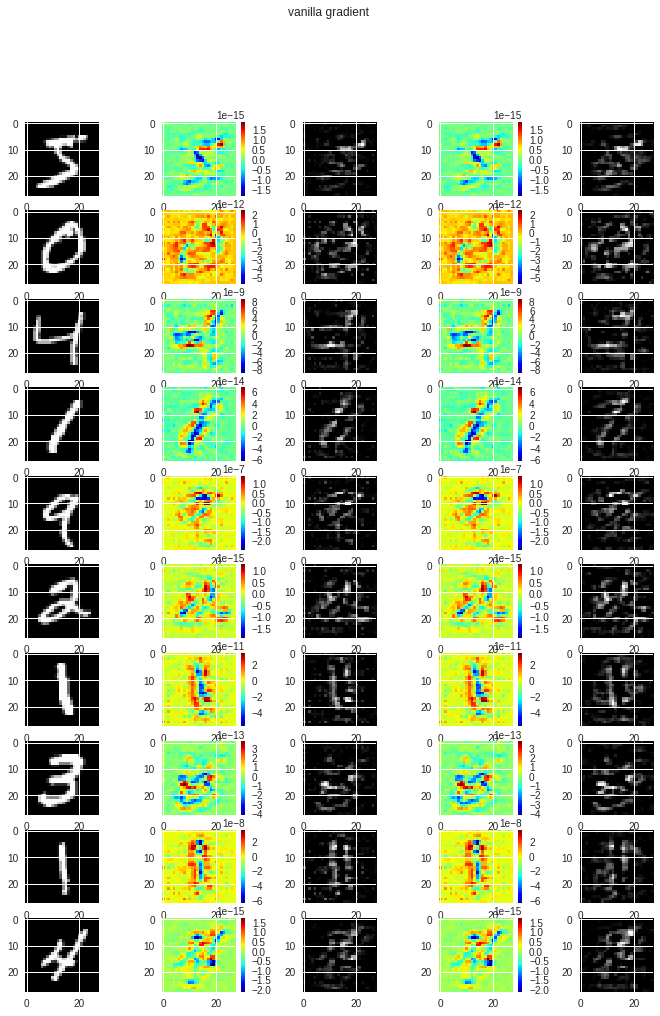

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing

Y_train_label = range(10)

fig, ax = plt.subplots(10, 5, figsize = (12, 16))
fig.suptitle('vanilla gradient')
for i in range(num_classes):
    img = np.array(x_train[i])
    
    vanilla = GradientSaliency(model, Y_train_label[i])
    mask = vanilla.get_mask(img)
    filter_mask = (mask > 0.0).reshape((28, 28))
    smooth_mask = vanilla.get_smoothed_mask(img)
    filter_smoothed_mask = (smooth_mask > 0.0).reshape((28, 28))

    ax[i, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    cax = ax[i, 1].imshow(mask.reshape((28, 28)), cmap = 'jet')
    fig.colorbar(cax, ax = ax[i, 1])
    ax[i, 2].imshow(mask.reshape((28, 28)) * filter_mask, cmap = 'gray')
    cax = ax[i, 3].imshow(mask.reshape((28, 28)), cmap = 'jet')
    fig.colorbar(cax, ax = ax[i, 3])
    ax[i, 4].imshow(smooth_mask.reshape((28, 28)) * filter_smoothed_mask, cmap = 'gray')